# 01.2 Logistic Regression

### Boilerplate imports

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
import math

ModuleNotFoundError: No module named 'torch'

### Generate training data

In [61]:
thetaOriginal = [5, -4, 2.5, 7, -3.5, 0.5]  # 5 features + bias
m = 100  # more samples for better separation
n = len(thetaOriginal)

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def logisticFunc(x, theta):
    assert len(x) == len(theta)
    z = sum(x[i] * theta[i] for i in range(len(x)))
    return sigmoid(z)

xData = []
yData = []

for _ in range(m):
    xNew = [random() * 10 for _ in range(n - 1)]  # random float features
    xNew.append(1.0)  # bias
    xData.append(xNew)

    prob = logisticFunc(xNew, thetaOriginal)
    y = 1 if random() < prob else 0
    yData.append([y])  # must be shape [m, 1]

### Matrix-fy inputs

In [62]:
# x:        R(m, n)
# y:        R(m, 1)
# theta:    R(n, 1)

# --- Convert to PyTorch tensors ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.tensor(xData, dtype=torch.float32, device=device)
y = torch.tensor(yData, dtype=torch.float32, device=device)
theta = torch.zeros((n, 1), dtype=torch.float32, device=device)

### Update rule

In [63]:
def hypothesis(x: torch.Tensor, theta: torch.Tensor) -> torch.Tensor:
    return torch.sigmoid(x @ theta)

def logisticThetaUpdate(x: torch.Tensor, y: torch.Tensor, theta: torch.Tensor, alpha: float) -> torch.Tensor:
    m = y.shape[0]
    hypo = hypothesis(x, theta)
    err = hypo - y
    grad = x.T @ err
    return theta - alpha / m * grad

### Test run

Epoch   0 | BCE Loss: 0.3891 | Accuracy: 85.00%
Epoch  10 | BCE Loss: 0.2349 | Accuracy: 86.00%
Epoch  20 | BCE Loss: 0.1851 | Accuracy: 93.00%
Epoch  30 | BCE Loss: 0.1588 | Accuracy: 94.00%
Epoch  40 | BCE Loss: 0.1421 | Accuracy: 95.00%
Epoch  50 | BCE Loss: 0.1304 | Accuracy: 97.00%
Epoch  60 | BCE Loss: 0.1217 | Accuracy: 98.00%
Epoch  70 | BCE Loss: 0.1148 | Accuracy: 98.00%
Epoch  80 | BCE Loss: 0.1092 | Accuracy: 98.00%
Epoch  90 | BCE Loss: 0.1046 | Accuracy: 98.00%
Epoch  99 | BCE Loss: 0.1011 | Accuracy: 98.00%

Final learned theta:
[0.5393602252006531, -0.3317925035953522, 0.2844592034816742, 0.6558062434196472, -0.41405943036079407, 0.007145482115447521]

Original theta:
[5, -4, 2.5, 7, -3.5, 0.5]


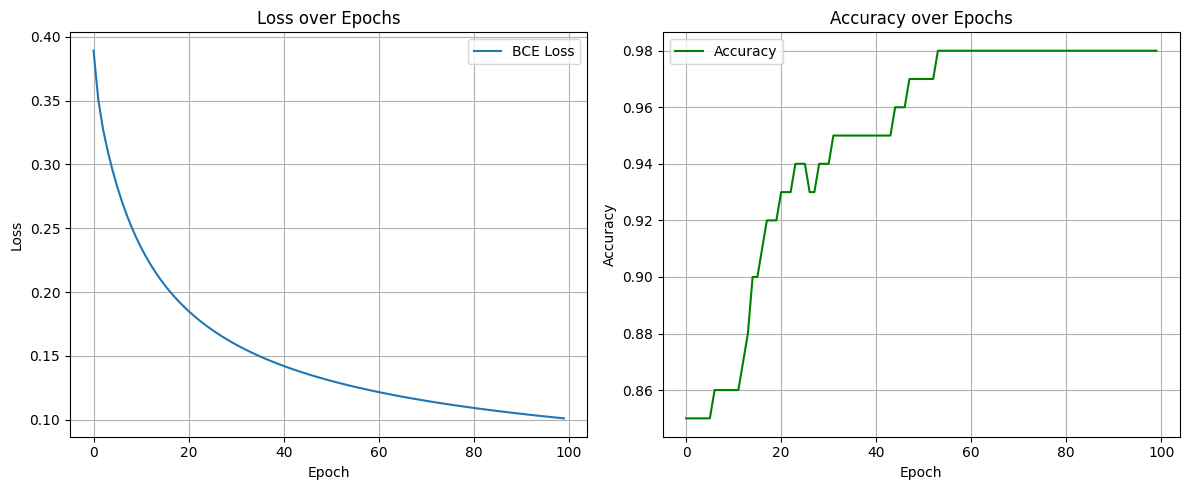

In [64]:
# --- Hyperparameters ---
alpha = 5e-2
epochs = 100
theta = torch.zeros((n, 1), dtype=torch.float32, device=device)

# --- Tracking metrics ---
losses = []
accuracies = []

# --- Training loop ---
for epoch in range(epochs):
    theta = logisticThetaUpdate(x, y, theta, alpha)

    with torch.no_grad():
        y_pred = hypothesis(x, theta)
        loss = -(y * torch.log(y_pred + 1e-8) + (1 - y) * torch.log(1 - y_pred + 1e-8)).mean()
        losses.append(loss.item())

        y_pred_class = (y_pred > 0.5).float()
        accuracy = (y_pred_class == y).float().mean().item()
        accuracies.append(accuracy)

        if epoch % 10 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch:3d} | BCE Loss: {loss.item():.4f} | Accuracy: {accuracy:.2%}")

# --- Final result ---
print("\nFinal learned theta:")
print(theta.flatten().tolist())
print("\nOriginal theta:")
print(thetaOriginal)

# --- Plotting ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(losses, label='BCE Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.grid(True)
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Accuracy', color='green')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
